In [1]:
from sympy import symbols, sin, exp, Derivative
from modeci_mdf.mdf import *




In [11]:
# Create a model 
mod = Model(id="3-connected-nodes")
# Defining graph for our model
mod_graph = Graph(id="state_example")
# Adding graph in our mod.graphs
mod.graphs.append(mod_graph)

a_node = Node(id="A")

a_node.parameters.append(Parameter(id="level", value=1.0))
a_node.output_ports.append(OutputPort(id="output", value = "level"))

mod_graph.nodes.append(a_node)

#https://mdf.readthedocs.io/en/latest/api/Specification.html#parameter
#Add a stateless parameter - this is a parameter which will evaluate to the same value every execution of the node (for the same external inputs)
b_node = Node(id="B")
b_node.input_ports.append(InputPort(id="input"))
mod_graph.nodes.append(b_node)
p1 = Parameter(
    id="2nd-node",
    value="1/(1+(input))",
)

b_node.parameters.append(p1)

b_node.output_ports.append(OutputPort(id="output", value="2nd-node"))


#Add a stateful parameter - this is a parameter whose value is influenced by a previous value of a parameter, possibly itself

c_node = Node(id="C")
c_node.input_ports.append(InputPort(id="input"))
mod_graph.nodes.append(c_node)
c_node.parameters.append(Parameter(id="3rd-node", value="100*input"))


c_node.output_ports.append(OutputPort(id="output", value="3rd-node"))



# Print the current structure
print(mod_graph.to_yaml())



state_example:
    nodes:
        A:
            parameters:
                level:
                    value: 1.0
            output_ports:
                output:
                    value: level
        B:
            input_ports:
                input: {}
            parameters:
                2nd-node:
                    value: 1/(1+(input))
            output_ports:
                output:
                    value: 2nd-node
        C:
            input_ports:
                input: {}
            parameters:
                3rd-node:
                    value: 100*input
            output_ports:
                output:
                    value: 3rd-node



In [12]:
from modeci_mdf.utils import simple_connect

e1 = simple_connect(a_node, b_node, mod_graph)
e2 = simple_connect(b_node, c_node, mod_graph)


# Print the current structure
print(mod_graph.to_yaml())


state_example:
    nodes:
        A:
            parameters:
                level:
                    value: 1.0
            output_ports:
                output:
                    value: level
        B:
            input_ports:
                input: {}
            parameters:
                2nd-node:
                    value: 1/(1+(input))
            output_ports:
                output:
                    value: 2nd-node
        C:
            input_ports:
                input: {}
            parameters:
                3rd-node:
                    value: 100*input
            output_ports:
                output:
                    value: 3rd-node
    edges:
        edge_A_B:
            sender: A
            receiver: B
            sender_port: output
            receiver_port: input
        edge_B_C:
            sender: B
            receiver: C
            sender_port: output
            receiver_port: input



Converting MDF graph: state_example to graphviz (level: 3, format: png)
    Node: A
    Node: B
    Node: C
    Edge: edge_A_B connects A to B
    Edge: edge_B_C connects B to C
Written graph image to: states.png


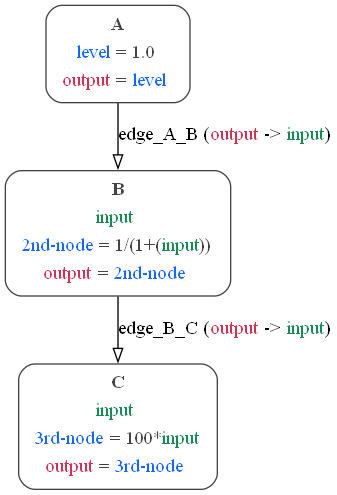

In [13]:

mod.to_graph_image(
        engine="dot",
        output_format="png",
        view_on_render=False,
        level=3,
        filename_root="states"
    )

from IPython.display import Image
Image(filename="states.png")


In [14]:
#Evaluating the graph once and printing out the output value
from modeci_mdf.execution_engine import EvaluableGraph

eg = EvaluableGraph(mod_graph, verbose=False)
eg.evaluate()

print('Output of A: %s'%eg.enodes["A"].evaluable_outputs["output"].curr_value)
print('Output of B: %s'%eg.enodes["B"].evaluable_outputs["output"].curr_value)
print('Output of C: %s'%eg.enodes["C"].evaluable_outputs["output"].curr_value)


Init graph: state_example
Evaluating graph: state_example, root nodes: ['A'], with array format numpy
Output of A: 1
Output of B: 0.5
Output of C: 50
